In [3]:
!pip install matplotlib

## Extracción

In [1]:
import pandas as pd
import matplotlib

In [2]:
## From kaggle get https://www.kaggle.com/datasets/brendan45774/test-file

In [2]:
df_titanic = pd.read_csv('../titanic.csv')


## Exploración - EDA

In [5]:
df_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: xlabel='Sex'>

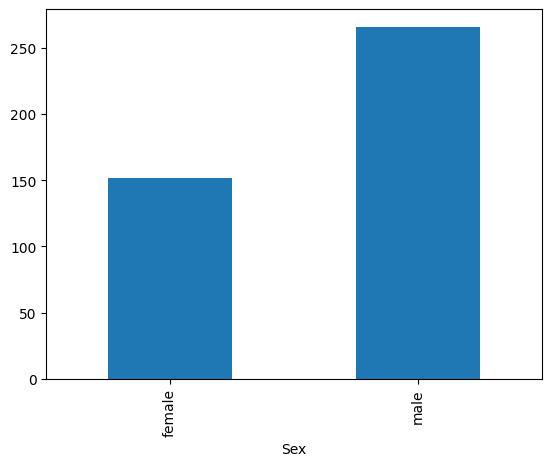

In [7]:
df_titanic.groupby('Sex')['Name'].count().plot.bar()

<Axes: ylabel='Name'>

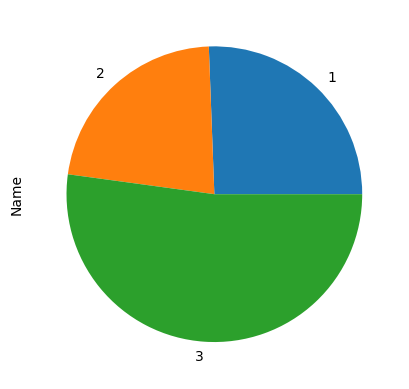

In [9]:
 df_titanic.groupby('Pclass')['Name'].count().plot.pie()

In [13]:
df_titanic.sample(2, random_state=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
362,1254,1,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S
154,1046,0,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S


In [14]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [15]:
df_titanic.loc[df_titanic.Sex == 'male', 'Name']

0                  Kelly, Mr. James
2         Myles, Mr. Thomas Francis
3                  Wirz, Mr. Albert
5        Svensson, Mr. Johan Cervin
7      Caldwell, Mr. Albert Francis
                   ...             
407      Widener, Mr. George Dunton
413              Spector, Mr. Woolf
415    Saether, Mr. Simon Sivertsen
416             Ware, Mr. Frederick
417        Peter, Master. Michael J
Name: Name, Length: 266, dtype: object

In [16]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Estadisticas

In [19]:
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [20]:
df_titanic.Age.max()

np.float64(76.0)

In [21]:
df_titanic.Age.min()

np.float64(0.17)

In [22]:
df_titanic.Age.mean()

np.float64(30.272590361445783)

In [23]:
df_titanic.Age.median()

np.float64(27.0)

In [18]:
df_titanic.Sex.value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

## Transformación 

In [24]:
df_titanic.Sex =  pd.Categorical(df_titanic.Sex).codes

In [25]:
df_titanic.Sex

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int8

In [26]:
df_titanic.Sex.value_counts()

Sex
1    266
0    152
Name: count, dtype: int64

###  Detección y limpieza de valores nulos

In [27]:
## check total null values by column
df_titanic.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
## Check all columns if someone has null values
df_titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [29]:
## check the columns names with null values
df_titanic.loc[:, df_titanic.isnull().any()].columns

Index(['Age', 'Fare', 'Cabin'], dtype='object')

In [30]:
df_titanic.shape

(418, 12)

In [31]:
df_titanic.dropna(inplace=True)
df_titanic.shape

(87, 12)

## Load to DB

In [32]:
import sqlite3

In [34]:
conn = sqlite3.connect("all_titanic.db")
df_titanic.to_sql('passangers',
                  con=conn,
                  if_exists="replace",
                  index=False)

87

In [35]:
df_from_db = pd.read_sql_query("SELECT * FROM passangers", conn) 
df_from_db

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,21228,82.2667,B45,S
1,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,W.E.P. 5734,61.1750,E31,S
2,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
3,918,1,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,113509,61.9792,B36,C
4,920,0,1,"Brady, Mr. John Bertram",1,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...,...
82,1296,0,1,"Frauenthal, Mr. Isaac Gerald",1,43.0,1,0,17765,27.7208,D40,C
83,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",1,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
84,1299,0,1,"Widener, Mr. George Dunton",1,50.0,1,1,113503,211.5000,C80,C
85,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,C78,Q
